C:\Users\nodoteve\AppData\Local\Temp\ipykernel_5696\290079468.py:72: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  a:DataFrame = df.pivot(colname,'1','v')


1                 Mu_r [Real Part]
Mu_r [Real Part]                  
1                         0.115857
2                         0.148481
3                         0.121793
4                         0.151451
5                         0.136399


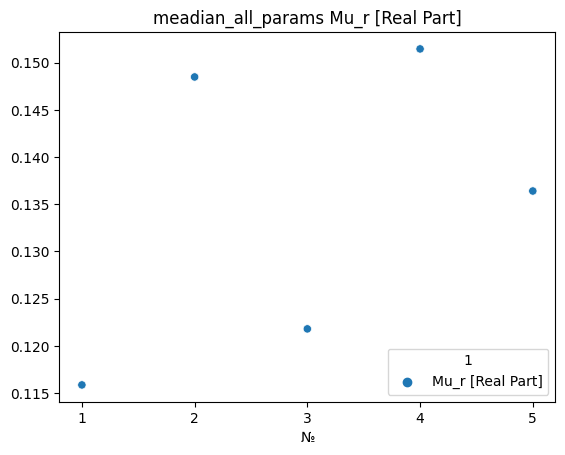

In [12]:
# Program to plot 2-D Heat map
# using seaborn.heatmap() method
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# rings1 - PEC rings simple lattice
# rings2 - copper rings simple lattice
# rings3 - copper rings 2 layer lattice with shift in direction of x axis

filename_template = "../rings5/mesh_impact/mesh_impact_"
exclude=("Epsilon_r [Real Part]","ExpTerm [Real Part]","S2,1 [Real Part]","n [Real Part]")
include=("Mu_r [Real Part]")
# data in the form of list of tuples
def get_and_apply_f(func):
    data_set = []
    for file_n in range(1,1000):
        filename= filename_template+str(file_n)+".txt"
        import os.path

        file_exists = os.path.exists(filename)
        if not file_exists:
            break
        with open(filename) as f:
            lines = f.readlines()
            for line_id in range(len(lines)):
                line = lines[line_id]
                if line[0] == "#":
                    if line[1] == '\"':
                        def read_param(name):
                            id = line.find(name + "=")
                            id_of_semicolon = line.find(";", id)
                            id_of_semicolon = (
                                id_of_semicolon if id_of_semicolon > 0 else len(line)
                            )
                            p = line[
                                id + len(name) + 1 : min(id_of_semicolon, line.find("}", id))
                            ]
                            return float(p)
                        w=(line.find(("\""),(line.find(("\""),2)+1)+1))
                        value_name = line[w+1:line.find("\"",w+1)]

                        vals = []
                        for id in range(line_id + 1, len(lines)):
                            line = lines[id]
                            if line[0] == "#":
                                if line[1] == "P":
                                    break
                            else:
                                tuple_of_vals = [float(x) for x in line.split()]
                                vals.append(tuple_of_vals[1])
                        if len(include) == 0:
                            if value_name not in exclude:
                                data_set.append((file_n, value_name, func(vals)))
                        else:
                            if value_name in include:
                                data_set.append((file_n, value_name, func(vals)))
    return data_set

# reformat data for drawing
import pandas as pd
from pandas import DataFrame

# create DataFrame using data
def draw(data, name):
    colname='Mu_r [Real Part]'
    df = pd.DataFrame(data, columns=[colname,'1','v'])
    # df[x_name]=df[x_name].round(3)
    # df[y_name]=df[y_name].round(3)
    # print(df[x_name],df[y_name])
    # print(df)

    a:DataFrame = df.pivot(colname,'1','v')
    # a = a.reindex(a.sort_values(by=y_name, ascending=False).index)

    print(a)
    ax = sns.scatterplot(a)
    plt.xlabel('№')
    ax.set_xticks(range(1,6)) # <--- set the ticks first

    title = name+"_all_params "+include
    plt.title(title)
    plt.savefig(filename_template.replace(".txt", "") +"_heatmap_"+title + ".png",bbox_inches='tight')
    plt.show()

# draw(get_and_apply_f(np.mean), "mean")
draw(get_and_apply_f(np.median), "meadian")
